<a href="https://colab.research.google.com/github/hyemworks/make-your-firstGAN-with-pytorch/blob/main/ch02_first_neuralnetwork_made_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Chapter 02 &nbsp;&nbsp;&nbsp;&nbsp; First Neural Network made with Pytorch</b>

## MNIST 이미지 데이터셋

✅ **MNIST** dataset

: 머신러닝 알고리즘을 테스트하는 데 쓰이는 데이터셋<br><br>
: 훈련용 이미지 60,000개 + 테스트용 이미지 10,000개<br>
: 각 이미지는 단일 색상의 28*28 pixel<br>
: 각 pixel은 0~255 사이의 값으로 밝기 표현됨.<br>



## MNIST 데이터 얻기

*책에서 제공하는 링크를 통해 다운로드 받은 후, 실행파일들이 들어있는 동일 폴더 내에 mnist_data 폴더를 만들어 그 안에 업로드*

## 데이터 살펴보기

업로드한 데이터를 파이썬에서 접근할 수 있도록 하기위해 **드라이브 마운트**가 필요하다!

In [ ]:
# mount Drive to access data files

from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [ ]:
# import pandas to read *.csv files

import pandas

In [ ]:
# read train_data to dataframe by pandas

df = pandas.read_csv("mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/mnist_data/mnist_train.csv", header = None)

<br>

✅ **pandas**의 <b>데이터 프레임$^{dataframe}$</b>

  : 넘파이 행렬과 비슷한 기능<br>
  : 열과 행의 관리 등 추가적인 기능이 제공되며,<br>
  &nbsp; 합계를 구하거나 데이터를 필터링하는 등의 편리한 기능도 제공됨.<br>
  <br>
  &nbsp;&nbsp; ▶ 우리가 사용하는 MNIST 데이터 파일이 **쉼표로 구분된 값**,<br>
  &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;즉 **CSV $^{comma-separated- values}$**로 이루어져 있기 때문에 pandas를 이용하는 것이 굉장히 편리!

<br>

In [ ]:
df.head() # show the 5 rows

# 맨 처음의 숫자  : 해당하는 이미지의 정답 숫자
# 나머지의 숫자   : 784(=28*28)개 픽셀 각각의 값

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info() # 데이터 프레임이 어떻게 구성되어 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


## matplotlib

In [ ]:
# import matplotlib to show img

import matplotlib.pyplot as plt

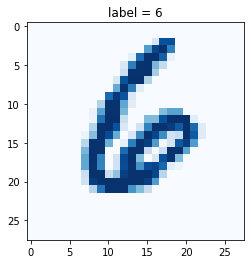

In [ ]:
# allocate data from dataframe
row=13
data=df.iloc[row]


# "label" is the first value
label = data[0]

# "image data" is the remaining 784 values
img = data[1:].values.reshape(28,28)


plt.title("label = " + str(label))
plt.imshow(img, interpolation ='none', cmap ='Blues')
plt.show()

In [ ]:
'''
위에서 row 값을 바꿔가면서 어떤 이미지 데이터와 라벨이 들어있는지 확인할 수 있다
'''

## 간단한 신경망 + 훈련 시각화

* **입력 레이어**$^{input-layer}$<br>
  : **784개** 노드 (<= MNIST 입력 이미지가 28x28, 즉 784개의 픽셀로 이루어져 있기 때문)
<br><br>
* **은닉 레이어**$^{hidden-layer}$<br>
  : 입력 레이어와 출력 레이어 사이에 존재하는 레이어.
<br><br>
* **출력 레이어**$^{output-layer}$<br>
  : **10개** 노드 (<= 0~9까지의 숫자 중 하나로 결론)

<br>
<br>

> ✅ <b>활성화 함수$^{activation-function}$<br></b>
: 출력값을 활성화를 일으키게 할 것인가를 정하고 그 값을 부여하는 함수<br>
: 종류 - Sigmoid, Step, ReLU
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;▶ 활성화 함수의 사용하는 이유?<br>
  * 데이터를 비선형으로 바꾸기 위함.
    * 왜 비선형으로 바꾸는가?<br>
    &nbsp;&nbsp; : 선형 시스템은 간단하지만, 망이 깊어지지 않는 단점이 존재!<br>
    &nbsp;&nbsp; : 신경망으로 설명해 보면 선형을 이용하여 아무리 복잡하게 만들고 싶어도 결국 수학적으로 hidden layer가 하나만 나옴.<br>
    &nbsp;&nbsp; : 식으로 보면 상수인 a, b가 있고 변수인 x, y가 있을 때 아래와 같이 생각할 수 있음
    &nbsp;&nbsp;&nbsp;&nbsp;$$f(ax+by)=af(x)+bf(y)$$

> 🦋 Sigmoid 대신 ReLU를 사용하는 이유는?<br>
  : 기울기 소실(Gradient Vanishing) 문제를 막기 위함.

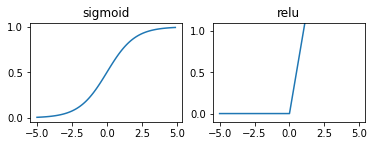

In [5]:
# Comparison of Sigmoid and ReLU

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x) : 
    return np.maximum(0, x)


x = np.arange(-5.0,5.0,0.1)

plt.subplot(221)
plt.title("sigmoid")
plt.plot(x, sigmoid(x))

plt.subplot(222)
plt.title("relu")
plt.plot(x, relu(x))

plt.ylim(-0.1,1.1)
plt.show()



> ✅ <b>완전 연결$^{fully-connected}$<br></b>
:  한 레이어의 모든 노드가 다음 레이어의 모든 노드와 연결이 되어 있는 방식의 구성
 
<br>

> 🦋 hidden layer가 많다는 건 어떤 장점이 있을까?<br>
* **매개 변수가 많이 필요가 없다.**
  * layer가 깊어지면 같은 수준의 정확도의 layer를 구현하더라도 매개변수가 더 적게 필요하다
* **필요한 연산의 수가 줄어든다.**
  * Fiter의 크기를 줄이고, 망을 깊게 만들면 연산 횟수가 줄어들면서 정확도를 유지하는 결과를 낸다.
<br>
▶ 이렇게 layer가 <b>깊어질수록</b> 효과를 내기 때문에 <b>Deep Learning</b>이라고도 한다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;활성화 함수를 사용하면 입력이 들어갈때, 출력값이 선형으로 나오지 않기 때문에 망을 깊게 만들 수 있다.<br>
&nbsp;&nbsp;&nbsp;&nbsp;반면, 선형시스템의 경우에는 망이 깊어지지 않으므로 망이 깊어지는 것에 대한 장점을 활용 할 수 없다. 
<br>

> ✅  **SGD$^{Stochastic-Gradient-Descent}$, 확률적 경사 하강법**<br><br>
: GD$^{Gradient-Descent}$를 전체 데이터(Batch)가 아닌 **일부 데이터의 모음(Mini-Batch)**를 사용하는 방법<br>
: BGD$^{Batch-Gradient-Descent}$는 하나의 Step을 위해 전체 데이터를 한번에 계산하므로 계산량이 많음<br>
: SGD는 Mini-Batch를 사용하기 때문에 다소 부정확할 수 있지만 계산 속도가 훨씬 빠르기 때문에, 같은 시간에 더 많은 Step을 나아갈 수 있음.<br>
: Local Minima에 빠지지 않고 Global Minima에 수렴할 가능성이 더 높음


<br>
<br>

In [ ]:
import torch
import torch.nn as nn


어떠한 신경망을 만들든, 항상 파이토치의 <b>torch.nn</b>을 상속받아 <b>클래스</b>를 만들어야 함!<br>
=> 이를 상속 받으면 자연스레 파이토치는 계산 그래프를 만들고, 훈련시 가중치를 조정하는 과정을 알아서 진행해 줌!


In [ ]:
class Classifier(nn.Module): # inheritance


    # Constructor
    def __init__(self):

        # 부모 클래스 초기화
        super().__init__()

        # 신경망 레이어 정의 - 통과시킬 레이어를 순서대로 기술
        self.model = nn.Sequential(
            nn.Linear(784, 200),    # Linear : 완전연결 매핑을 의미 => 여기에서는 훈련 시 노드를 업데이트할 가중치에 대한 정보도 포함되어 있음
            nn.Sigmoid(),
            nn.Linear(200, 10),     # Linear : ,,
            nn.Sigmoid()
        )

        # Loss Function 설정
        self.loss_function = nn.MSELoss()

        # Optimizer 설정
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        # 훈련 시각화 (train 함수에서 사용될 변수 초기화)
        self.counter = 0
        self.progress = []



    # forward function : 네트워크에 정보 전달
    def forward(self, inputs):
        # 모델 실행
        return self.model(inputs)


      
    # train
    def train(self, inputs, targets):
        # inputs  : 신경망에 전달할 입력  
        # targets : 원하는 목표 --> 이를 통해 손실을 계산

        ### 신경망 출력 계산
        outputs = self.forward(inputs)  # train 함수에서 가장 먼저 해야할 일! == forward()로 입력값을 신경망에 전달하여 결과를 얻어내는 것
        
        ### 손실 계산
        loss = self.loss_function(outputs, targets)
        #  계산 그래프의 마지막 노드는 손실함수!
        #   => 손실 계산을 위해 각 노드에서 기울기가 변하는 것은 각 학습 파라미터가 변할 때마다 손실이 변하는 것과 같음
        

        ### 훈련 시각화 (모니터링)
        # 카운터를 증가시키고 10회마다 오차 저장
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item()) # item() : 텐서에서 값을 꺼내오는 함수
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)


        ### 손실을 사용해 네트워크의 가중치를 업데이트
        # 기울기 초기화
        self.optimizer.zero_grad()  # 계산 그래프의 기울기가 모두 0으로 초기화
                                    #   : 신경망을 훈련할 때마다 매번 기울기는 0으로 설정되어 있어야 함
                                    #      => 그렇게 하지 않으면 loss.backward()를 따라 계산마다 쌓이게 됨
        # 역전파 실행
        loss.backward()
        # 가중치 갱신
        self.optimizer.step()


  
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    

<br>

✅ **nn.Linear**

  : 완전연결 매핑을 의미.<br>
  : 훈련 시 노드를 업데이트할 가중치에 대한 정보 포함.<br>
  : 입력부터 츨력이 $Wx+B$와 같은 선형함수$^{Linear-Function}$ 형태로 전달됨.<br>
  &nbsp;&nbsp;&nbsp;&nbsp; ↪ 여기서, $W$는 가중치$^{Weight}$, $B$는 편향$^{Bias}$임.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 두가지 파라미터 모두 훈련 중에 업데이트되므로, **학습 파라미터$^{learnable-parameter}$**라고 부름!


```
# 신경망 구조 정의
self.model = nn.Sequential(
            nn.Linear(784, 200),  
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
```

<br>

✅ **nn.MSELoss**

  : 평균제곱오차 = MSE$^{mean-squared-error}$<br>
  : 실제와 예측된 결과 사이의 차이를 계산해 제곱하여, 그 평균을 계산하는 방법<br>
```
# 손실함수 설정
self.loss_function = nn.MSELoss()
```

<br>

✅ **torch.optim.SGD**

  : 확률적 경사하강법 = SGD$^{stochastic-gradient-descent}$<br>
  : 손실을 이용해서 네트워크의 가중치를 수정하는 방법<br>
  : 학습률 값 설정해야 함<br>
  : 파이토치가 제공하는 **self.parameters()**를 통해 학습파라미터에 접근 가능.
```
# SGD 옵티마이저 설정
self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
```

<br>

✅ **forward()**

  : **nn.Sequential()**로 정의한 **self.model**에 input값을 전달한 후 모델의 결과를 반환.<br>
```
# forward() : 모델 실행
def forward(self, inputs):
    return self.model(inputs)
```

<br>

🦋 **item()**

  : 텐서에서 값을 꺼내오는 함수<br>

---

## **Summary**<br>
>* 신경망 클래스를 하나 만들어서 **nn.Module**로부터 상속.(nn.Module은 신경망을 만드는 데 필요한 많은 일을 대신 해줌)
* 신경망에서 작동할 여러요소들을 정의함. 간단한 신경망이므로 **nn.Sequential**을 사용함.
* **학습 파라미터**를 업데이트하기 위해 **Optimizer**와 **Loss function**를 정의함.
* 마지막으로 **forward()** 함수를 구현해 파이토치에서 정보가 네트워크를 타고 흐를 수 있도록 함.
<br>
<br>
* 계산 그래프의 기울기는 **optimizer.zero_grad()**를 통해 모두 0을 초기화됨.
* 신경망의 기울기는 손실함수의 **loss.backward()**를 통해 계산됨.
* 이 기울기는 **optimizer.step()**을 통해 신경망 학습의 학습 파라미터를 갱신하는 데 이용됨.

<br>

---

## MNIST 데이터셋 클래스

▶ 파이토치는 **torch.utils.data.DataLoader**를 통해 데이터를 셔플하거나, 병렬로 데이터를 부르거나, 배치 작업하는 것 등의 작업을 수행<br>
▶ 개발자는 **torch.utils.data.DataSet** 객체로 이러한 기능을 간편하게 사용할 수 있음.

DataSet 클래스에서 데이터셋을 상속받을 때는 다음 두가지의 특수 메서드를 구현해야 함.

* **\_\_len__()** : 데이터셋의 길이를 반환
* **\_\_getitem__()** : 데이터셋의 n번째 아이템을 반환

In [ ]:
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

In [ ]:
# MNIST DATASET CLASS

class MnistDataset(Dataset):

  # Constructor
  def __init__(self, csv_file):
    # csv_file 읽어오기
    self.data_df = pandas.read_csv(csv_file, header=None)


  def __len__(self):
    # 데이터 프레임의 길이 반환
    return len(self.data_df)


  # 특정 아이템을 인덱스를 통해 접근가능한 함수
  def __getitem__(self,index):
    # 이미지 (목표)레이블
    label = self.data_df.iloc[index,0]  # 각 행의 첫번째 인덱스, 즉 정답레이블을 읽어옴.(정답은 0~9까지 존재)
    target = torch.zeros((10))          # target이란 "정답" 종이 만들기
    target[label] = 1.0                 # 정답 레이블의 위치에만 1로 지정. 나머지는 0 (원-핫 인코딩 방식)

    # 0 - 255의 이미지를 0 - 1로 정규화
    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0

    # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
    return label, image_values, target



  # MNIST 데이터셋 내의 특정 이미지를 골라 차트를 그려보는 메서드
  def plot_image(self, index):
    img = self.data_df.iloc[index,1:].values.reshape(28,28) # 2D로 변형
    plt.title("label = " + str(self.data_df.iloc[index,0])) # 정답레이블 제목으로 붙이기
    plt.imshow(img, interpolation='none', cmap = 'Blues')   # 나타내기


위 클래스로부터 객체 하나가 생성될 때,<br>
csv_file이 하나 읽어들여지고 data_df라는 팬더스 데이터프레임으로 할당된다!

이제 작업 중인 데이터를 확인해보자!

먼저, 데이터셋 클래스에서 객체를 하나 만들며 CSV 파일의 경로명을 인수로 넣어준다!


In [ ]:
mnist_dataset = MnistDataset("mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/mnist_data/mnist_train.csv")

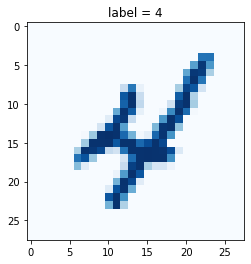

In [ ]:
mnist_dataset.plot_image(9)

In [ ]:
# 객체에 인덱스로도 접근 가능
# __getitem__()함수
#           반환 항목 : label         (= 정답인 숫자)
#                     image_values  (= 784개의 정규화된 각 픽셀밝기)
#                     target        (= 정답표)

mnist_dataset[100]

(5,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

## 분류기(Classifier) 훈련시키기

In [ ]:
%%time

# 신경망 생성
C = Classifier()


# MNIST 데이터에 대해 훈련 진행
epochs = 3

for i in range(epochs):
  print('training epoch', i+1, 'of', epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 3min 10s, sys: 1.73 s, total: 3min 12s
Wall time: 3min 12s


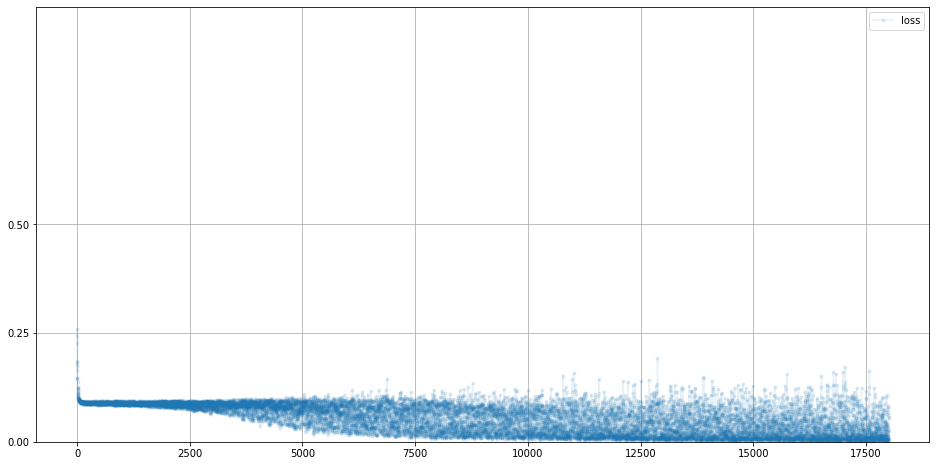

In [ ]:
C.plot_progress()

## 신경망에 쿼리하기

In [ ]:
# Load MNIST Test Data

mnist_test_dataset = MnistDataset("mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/mnist_data/mnist_test.csv")

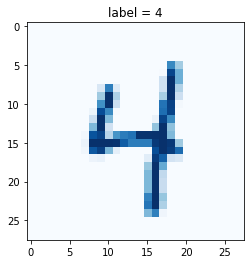

In [ ]:
# Pick a record
record = 19

# Plot 'image' and 'correct label'
mnist_test_dataset.plot_image(record)

'\n출력 output을 단순한 넘파이 배열로 변환한 후\n다시 데이터프레임으로 래핑해서\n막대도표로 표현함!\n'

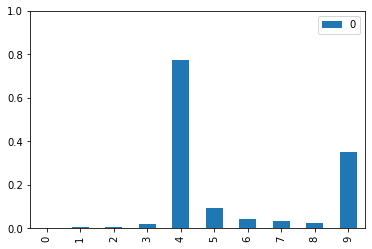

In [ ]:
# visualize the answer given by the neural network #

image_data = mnist_test_dataset[record][1] # index 19의 레코드에서 이미지 픽셀값들을 추출하여 image_data에 저장

# query form trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend='False', ylim=(0,1))
'''
출력 output을 단순한 넘파이 배열로 변환한 후
다시 데이터프레임으로 래핑해서
막대도표로 표현함!
'''

## 분류기의 성능

In [ ]:
# TEST trained neural network on training data

score=0
items=0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()

  if (answer.argmax() == label):
    score += 1
  items+=1

print(score, items, score/items)

8662 10000 0.8662



<br>

### [+]
> 출력층에서의 신호전달 출력층의 활성화 함수는 풀고자하는 문제의 성질에 맞게 결정함.
* 회귀 - 항등함수
* 2클래스 분류 - 시그모이드 함수
* 다중클래스 분류 - 소프트 맥스 함수


> ✅ 회귀$^{regression}$<br>
: 입력 데이터에서 (연속적인) 수치를 예측하는 문제<br>
&nbsp;&nbsp;&nbsp;&nbsp;ex) 사진 속 인물의 몸무게 예측<br>
<br>
 ✅ 분류$^{classification}$<br>
: 데이터가 어느 클래스에 속하느냐는 문제<br>
&nbsp;&nbsp;&nbsp;&nbsp;ex) 사진 속 인물의 성별 분류